# Problem 1

## (a)

In [4]:
import numpy as np

P = np.array([[0.2, 0.7, 0.1],
             [0.2, 0.5, 0.3],
             [0.2, 0.4, 0.4]])

P

array([[0.2, 0.7, 0.1],
       [0.2, 0.5, 0.3],
       [0.2, 0.4, 0.4]])

## (b)

In [5]:
current_state = 1
num_steps = 15

chain_realization = [current_state]

for i in range(num_steps):
    probabilities = P[current_state - 1, :]
    next_state = np.random.choice([1, 2, 3], p=probabilities)  
    current_state = next_state 
    chain_realization.append(current_state)

print("Markov Chain Realization:", chain_realization)

Markov Chain Realization: [1, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 1, 2, 2, 1, 2]


# Problem 2

## (b)

initial pi_0 :  [0.37 0.35 0.28]
pi_i at time 100: [0.2        0.51111111 0.28888889]
initial pi_0 :  [0.18 0.55 0.27]
pi_i at time 100: [0.2        0.51111111 0.28888889]
initial pi_0 :  [0.19 0.44 0.37]
pi_i at time 100: [0.2        0.51111111 0.28888889]


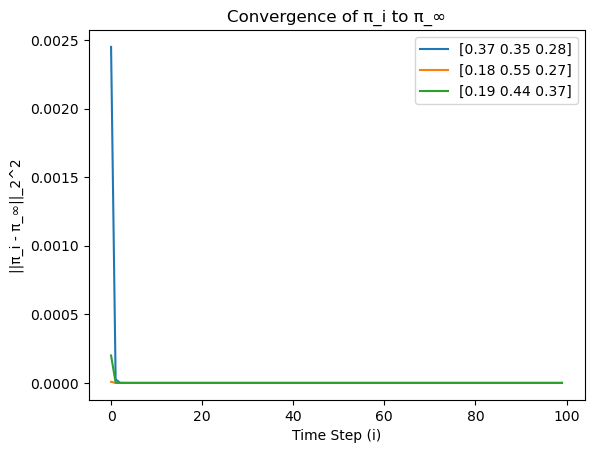

In [43]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(2)
pi_infinity = np.array([0.2, 0.511, 0.289])


num_steps = 100

pi_0 = np.random.rand(3)
pi_0 /= np.sum(pi_0)

    
def compute(pi_0, num_steps):
    norm_values = []
    for i in range(num_steps):
        pi_i = np.dot(pi_0, P)
        norm_values.append(np.linalg.norm(pi_i - pi_infinity)**2)

        pi_0 = pi_i
    return(norm_values, pi_0)


pi_0_1 = np.random.rand(3)
pi_0_1 /= np.sum(pi_0_1)  # Normalize
pi_0_1 = np.round(pi_0_1, 2)
norm_values_1, pi_i_1 = compute(pi_0_1, num_steps)
print("initial pi_0 : ", pi_0_1)
print("pi_i at time 100:" , pi_i_1)


pi_0_2 = np.random.rand(3)
pi_0_2 /= np.sum(pi_0_2)  # Normalize
pi_0_2 = np.round(pi_0_2, 2)
norm_values_2, pi_i_2 = compute(pi_0_2, num_steps)
print("initial pi_0 : ", pi_0_2)
print("pi_i at time 100:" , pi_i_2)

pi_0_3 = np.random.rand(3)
pi_0_3 /= np.sum(pi_0_3)  # Normalize
pi_0_3 = np.round(pi_0_3, 2)
norm_values_3, pi_i_3 = compute(pi_0_3, num_steps)
print("initial pi_0 : ", pi_0_3)
print("pi_i at time 100:" , pi_i_3)


plt.plot(range(num_steps), norm_values_1, label = pi_0_1)
plt.plot(range(num_steps), norm_values_2, label = pi_0_2)
plt.plot(range(num_steps), norm_values_3, label = pi_0_3)
plt.xlabel('Time Step (i)')
plt.ylabel('||π_i - π_∞||_2^2')
plt.title('Convergence of π_i to π_∞')
plt.legend()
plt.show()


According to the output result, we can find all the three initial $\pi_0$, $\pi_i \to \pi_{\infty}$.
According to the plot, we can find that the error between $\pi_i^T$ and $\pi_{\infty}^T$ approach to 0 as steps number i increase

# Problem 3

## (a)

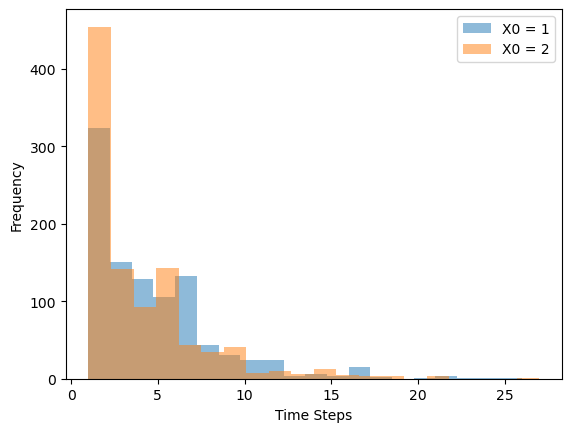

Mean Arrival Time when X0 = 1: 4.672
Mean Arrival Time when X0 = 2: 3.874


In [78]:
absorbing_state = 2

num_simulations = 1000

def simulate_markov_chain(start_state):
    current_state = start_state
    time = 0

    while current_state != absorbing_state:
        current_state = np.random.choice(range(3), p=P[current_state])
        time += 1

    return time

# when X0 = 1
arrival_times_x0_1 = []
for i in range(num_simulations):
    arrival_times_x0_1.append(simulate_markov_chain(0))

# when X0 = 2 
arrival_times_x0_2 = []
for i in range(num_simulations):
    arrival_times_x0_2.append(simulate_markov_chain(1))

plt.hist(arrival_times_x0_1, bins=20, alpha=0.5, label='X0 = 1')
plt.hist(arrival_times_x0_2, bins=20, alpha=0.5, label='X0 = 2')
plt.xlabel('Time Steps')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# get mean times
mean_time_x01 = np.mean(arrival_times_x0_1)
mean_time_x02 = np.mean(arrival_times_x0_2)

print("Mean Arrival Time when X0 = 1:", mean_time_x01)
print("Mean Arrival Time when X0 = 2:", mean_time_x02)